In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
def plot_result(hist, loss_min=None, loss_max=None):

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist.epoch, hist.history['loss'], label="train")
    plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
    plt.title('Loss')
    if loss_min!=None and loss_max!=None:
        plt.ylim(loss_min, loss_max)

    plt.xlabel('에폭수')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist.epoch, hist.history['accuracy'], label='train')
    plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
    plt.title('Accuracy')
    plt.xlabel('에폭수')
    plt.ylabel('accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [39]:
# MNIST 데이터셋 로딩
(train_image, train_label), (test_image, test_label)  = keras.datasets.mnist.load_data()

# 전처리 - X: scaling, y: one hot encoding 처리
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

X_train = train_image.astype('float32')/255  # uint8->float32, min max scaling
X_test = test_image.astype('float32')/255

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.dtype, X_test.dtype)

(60000, 28, 28) (10000, 28, 28) (60000, 10) (10000, 10)
float32 float32


In [ ]:
# 하이퍼파리미터
LEARNING_RATE = 0.001
N_EPOCH = 20
N_BATCH = 1000

# 모델의 크기 변경 -> 성능 확인

In [ ]:
def get_small_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(10, activation='softmax', name='output_layer'))

    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
small_model = get_small_model()
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# TODO: 100 에폭 이상 학습
hist = small_model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=N_BATCH, validation_split=0.25)

Epoch 1/20
45/45 [==============================] - 1s 13ms/step - loss: 1.5940 - accuracy: 0.5828 - val_loss: 1.0347 - val_accuracy: 0.8077
Epoch 2/20
45/45 [==============================] - 0s 7ms/step - loss: 0.8629 - accuracy: 0.8252 - val_loss: 0.6953 - val_accuracy: 0.8536
Epoch 3/20
45/45 [==============================] - 0s 6ms/step - loss: 0.6501 - accuracy: 0.8545 - val_loss: 0.5665 - val_accuracy: 0.8695
Epoch 4/20
45/45 [==============================] - 0s 9ms/step - loss: 0.5518 - accuracy: 0.8692 - val_loss: 0.4978 - val_accuracy: 0.8782
Epoch 5/20
45/45 [==============================] - 1s 12ms/step - loss: 0.4938 - accuracy: 0.8801 - val_loss: 0.4542 - val_accuracy: 0.8876
Epoch 6/20
45/45 [==============================] - 0s 10ms/step - loss: 0.4546 - accuracy: 0.8864 - val_loss: 0.4242 - val_accuracy: 0.8910
Epoch 7/20
45/45 [==============================] - 1s 12ms/step - loss: 0.4265 - accuracy: 0.8919 - val_loss: 0.4020 - val_accuracy: 0.8961
Epoch 8/20
45/45

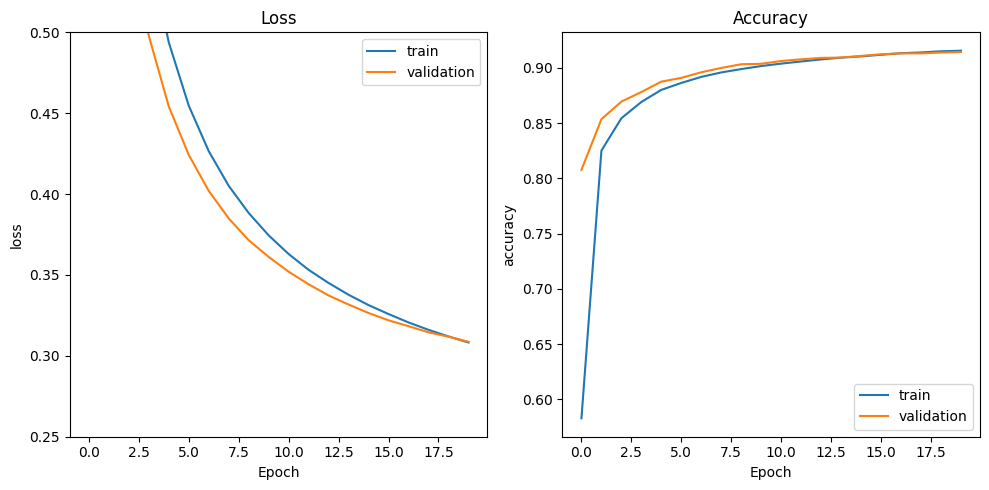

In [10]:
# 시각화
plot_result(hist, 0.25, 0.5)

In [ ]:
def get_big_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dense(10, activation='softmax', name='output_layer'))

    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
big_model = get_big_model()
big_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)              

In [13]:
hist = big_model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=N_BATCH, validation_split=0.25)

Epoch 1/20
45/45 [==============================] - 7s 126ms/step - loss: 0.8318 - accuracy: 0.7217 - val_loss: 0.2611 - val_accuracy: 0.9240
Epoch 2/20
45/45 [==============================] - 4s 98ms/step - loss: 0.1889 - accuracy: 0.9443 - val_loss: 0.1472 - val_accuracy: 0.9555
Epoch 3/20
45/45 [==============================] - 6s 127ms/step - loss: 0.1188 - accuracy: 0.9647 - val_loss: 0.1395 - val_accuracy: 0.9601
Epoch 4/20
45/45 [==============================] - 4s 94ms/step - loss: 0.0833 - accuracy: 0.9749 - val_loss: 0.1107 - val_accuracy: 0.9694
Epoch 5/20
45/45 [==============================] - 4s 94ms/step - loss: 0.0582 - accuracy: 0.9832 - val_loss: 0.1286 - val_accuracy: 0.9641
Epoch 6/20
45/45 [==============================] - 5s 117ms/step - loss: 0.0422 - accuracy: 0.9874 - val_loss: 0.1010 - val_accuracy: 0.9733
Epoch 7/20
45/45 [==============================] - 4s 98ms/step - loss: 0.0295 - accuracy: 0.9917 - val_loss: 0.0990 - val_accuracy: 0.9741
Epoch 8/20

In [ ]:
plot_result(hist, 0.05, 0.15)

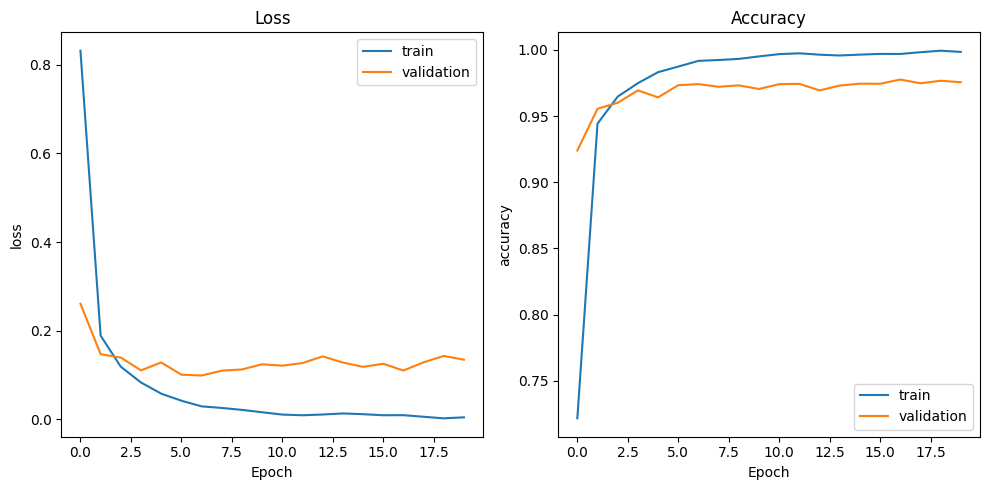

In [16]:
plot_result(hist)#, 0.05, 0.15)

In [17]:
print(small_model.evaluate(X_test, y_test))
print(big_model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 1ms/step - loss: 0.2987 - accuracy: 0.9169
[0.29868367314338684, 0.9168999791145325]
313/313 [==============================] - 1s 3ms/step - loss: 0.1141 - accuracy: 0.9772
[0.11409172415733337, 0.9771999716758728]


# Dropout Layer

In [ ]:
# Dropout Layer는 Dropout을 적용하려는 Layer 앞에 정의한다.
def get_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))

    model.add(layers.Dropout(rate=0.3))  # rate: dropout node의 비율 (0.2 ~ 0.5)
    model.add(layers.Dense(512, activation='relu'))

    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512, activation='relu'))

    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, activation='relu'))

    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax', name='output_layer')) # output layer

    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
dropout_model = get_dropout_model()
dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [21]:
# Dropout Layer를 사용하면 사용하지 않았을 때 보다 epoch을 더 늘려야 한다.
hist = dropout_model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=N_BATCH, validation_split=0.25)

Epoch 1/20
45/45 [==============================] - 8s 131ms/step - loss: 2.0861 - accuracy: 0.2072 - val_loss: 1.5121 - val_accuracy: 0.5263
Epoch 2/20
45/45 [==============================] - 6s 129ms/step - loss: 1.2113 - accuracy: 0.5754 - val_loss: 0.5251 - val_accuracy: 0.8032
Epoch 3/20
45/45 [==============================] - 6s 126ms/step - loss: 0.6344 - accuracy: 0.7938 - val_loss: 0.2665 - val_accuracy: 0.9314
Epoch 4/20
45/45 [==============================] - 5s 119ms/step - loss: 0.4141 - accuracy: 0.8964 - val_loss: 0.1881 - val_accuracy: 0.9509
Epoch 5/20
45/45 [==============================] - 6s 137ms/step - loss: 0.3344 - accuracy: 0.9212 - val_loss: 0.1722 - val_accuracy: 0.9576
Epoch 6/20
45/45 [==============================] - 5s 116ms/step - loss: 0.2900 - accuracy: 0.9342 - val_loss: 0.1623 - val_accuracy: 0.9603
Epoch 7/20
45/45 [==============================] - 6s 141ms/step - loss: 0.2587 - accuracy: 0.9413 - val_loss: 0.1425 - val_accuracy: 0.9653
Epoch 

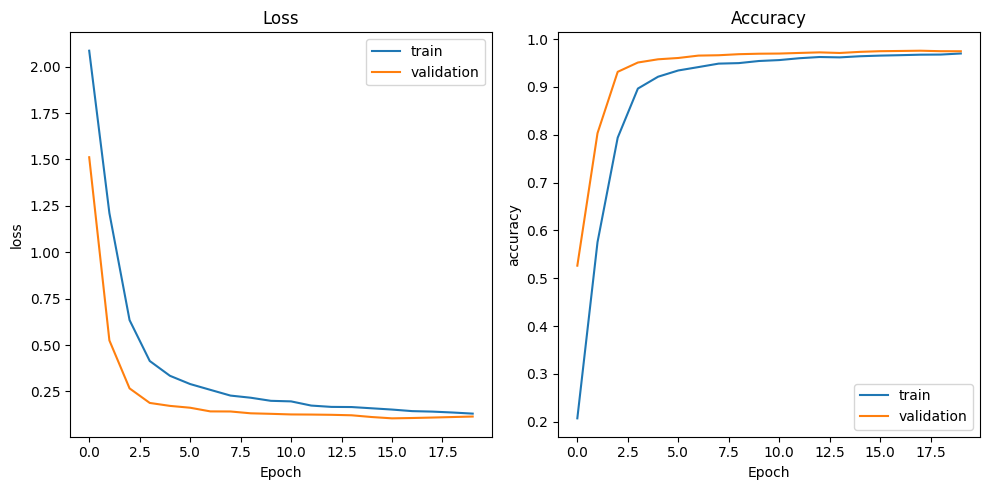

In [22]:
plot_result(hist)

# Batch Normalization 예제

In [ ]:
def get_model_bn(lr=0.01):

    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))


    # (Dropout Layer ->) Dense Layer -> Batch Normalization -> ReLU(Activation)
    model.add(layers.Dense(256))  # WX + B
    model.add(layers.BatchNormalization())  # 평균: 0+beta, 표준편차: 1 * gamma
    model.add(layers.ReLU())      # activation 함수:   layers.Activation("함수명")

    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # output layer
    model.add(layers.Dense(10))
    model.add(layers.Softmax())

    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
model_bn = get_model_bn(LEARNING_RATE)
model_bn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [25]:
hist = model_bn.fit(X_train, y_train, epochs=N_EPOCH, batch_size=N_BATCH, validation_split=0.25)

Epoch 1/20
45/45 [==============================] - 6s 79ms/step - loss: 0.6862 - accuracy: 0.8197 - val_loss: 1.5431 - val_accuracy: 0.9221
Epoch 2/20
45/45 [==============================] - 2s 48ms/step - loss: 0.1577 - accuracy: 0.9606 - val_loss: 0.7911 - val_accuracy: 0.9490
Epoch 3/20
45/45 [==============================] - 2s 48ms/step - loss: 0.0824 - accuracy: 0.9809 - val_loss: 0.3756 - val_accuracy: 0.9582
Epoch 4/20
45/45 [==============================] - 2s 49ms/step - loss: 0.0483 - accuracy: 0.9897 - val_loss: 0.1849 - val_accuracy: 0.9677
Epoch 5/20
45/45 [==============================] - 2s 47ms/step - loss: 0.0281 - accuracy: 0.9948 - val_loss: 0.1337 - val_accuracy: 0.9709
Epoch 6/20
45/45 [==============================] - 3s 76ms/step - loss: 0.0166 - accuracy: 0.9976 - val_loss: 0.1040 - val_accuracy: 0.9730
Epoch 7/20
45/45 [==============================] - 2s 46ms/step - loss: 0.0109 - accuracy: 0.9984 - val_loss: 0.0979 - val_accuracy: 0.9732
Epoch 8/20
45

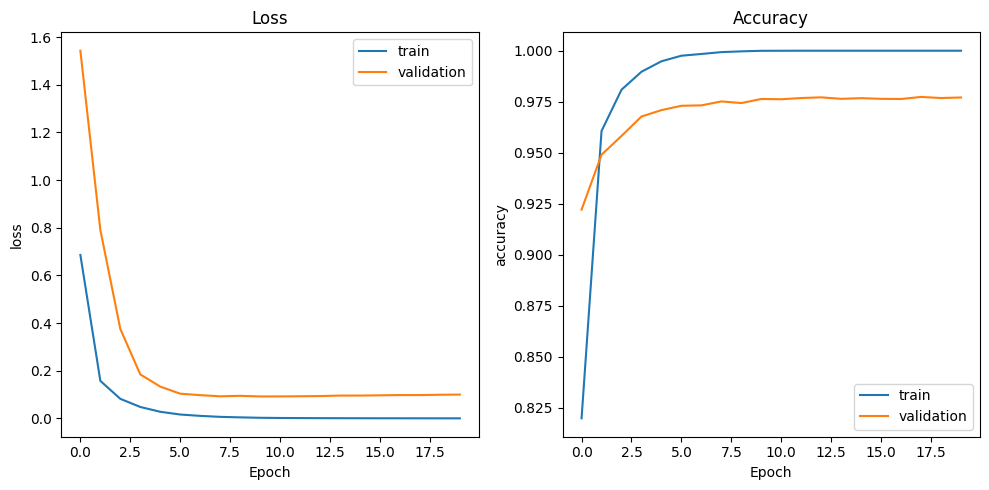

In [26]:
plot_result(hist)

# Learning Rate 변화를 통한 성능개선

## Learning Rate scheduler 를 이용
- 특정 step 마다 learning rate를 변경

In [32]:
# 에폭당 step 수
# ceil(train데이터개수/batch_size)
int(np.ceil(X_train.shape[0]*0.75/N_BATCH))

45

In [ ]:
def get_model_lr(initial_lr=0.01):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax', name='output_layer'))

    # Learning Rate Scheduler 객체 생성 -> optimizer의 LR로 설정
    # Learning Rate Scheduler: 학습하는 동안 LR를 어떻게 바꿀지 스케줄링 하는 객체.
    #     ExponentialDecay: 특정 step당 특정 비율로 LR를 변경해 나간다.
    lr_sch = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=initial_lr,   # 시작 LR
        decay_steps=int(np.ceil(X_train.shape[0]*0.75/N_BATCH)) * 5,   # 5 epoch. 몇 step당  변경할지 step수를 설정.
        decay_rate=0.5,  # 변경 비율. 현재LR * decay_rate = 새LR
        staircase=True # decay_steps 가 되면 한번에 바꿀지(True) 조금씩 바꿔 나갈지(False) 여부
    )

    model.compile(optimizer=optimizers.Adam(learning_rate=lr_sch),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [36]:
model_lr = get_model_lr(LEARNING_RATE)
hist = model_lr.fit(X_train, y_train, epochs=N_EPOCH, batch_size=N_BATCH, validation_split=0.25)

Epoch 1/20
45/45 [==============================] - 3s 41ms/step - loss: 0.7400 - accuracy: 0.8025 - val_loss: 0.2858 - val_accuracy: 0.9173
Epoch 2/20
45/45 [==============================] - 1s 30ms/step - loss: 0.2402 - accuracy: 0.9306 - val_loss: 0.2052 - val_accuracy: 0.9410
Epoch 3/20
45/45 [==============================] - 1s 27ms/step - loss: 0.1731 - accuracy: 0.9496 - val_loss: 0.1710 - val_accuracy: 0.9514
Epoch 4/20
45/45 [==============================] - 1s 30ms/step - loss: 0.1311 - accuracy: 0.9617 - val_loss: 0.1373 - val_accuracy: 0.9601
Epoch 5/20
45/45 [==============================] - 1s 27ms/step - loss: 0.1044 - accuracy: 0.9695 - val_loss: 0.1273 - val_accuracy: 0.9621
Epoch 6/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0839 - accuracy: 0.9760 - val_loss: 0.1188 - val_accuracy: 0.9655
Epoch 7/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0792 - accuracy: 0.9778 - val_loss: 0.1174 - val_accuracy: 0.9661
Epoch 8/20
45

## callback 을 이용해 학습률 변경
- ReduceLROnPlateau callback을 이용

In [ ]:
def get_model_lr2(initial_lr=0.01):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax', name='output_layer'))

    model.compile(optimizer=optimizers.Adam(learning_rate=initial_lr),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model_lr2 = get_model_lr2(LEARNING_RATE)

In [43]:
# 학습중, 특정 평가지표의 성능이 지정한 epoch동안 학습을 해도 개선이 안되면 LR를 변경.
lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', # 평가지표
                                                factor=0.5,  # LR 변화율. 새LR = 현재LR * factor
                                                patience=3,  # 개선되는지 기다려볼 epoch수.
                                                verbose=2    # LR가 변경될때 마다 log(기록)을 출력.(0, 1, 2)
                                               )

hist = model_lr2.fit(X_train, y_train, epochs=N_EPOCH + 20, batch_size=N_BATCH, validation_split=0.25
                     , callbacks=[lr_callback])

Epoch 1/20
45/45 [==============================] - 2s 33ms/step - loss: 0.7560 - accuracy: 0.8014 - val_loss: 0.2726 - val_accuracy: 0.9232 - lr: 0.0010
Epoch 2/20
45/45 [==============================] - 1s 31ms/step - loss: 0.2316 - accuracy: 0.9333 - val_loss: 0.2084 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 3/20
45/45 [==============================] - 1s 31ms/step - loss: 0.1688 - accuracy: 0.9516 - val_loss: 0.1751 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 4/20
45/45 [==============================] - 1s 31ms/step - loss: 0.1316 - accuracy: 0.9617 - val_loss: 0.1526 - val_accuracy: 0.9553 - lr: 0.0010
Epoch 5/20
45/45 [==============================] - 1s 27ms/step - loss: 0.1069 - accuracy: 0.9688 - val_loss: 0.1365 - val_accuracy: 0.9605 - lr: 0.0010
Epoch 6/20
45/45 [==============================] - 1s 31ms/step - loss: 0.0883 - accuracy: 0.9746 - val_loss: 0.1379 - val_accuracy: 0.9613 - lr: 0.0010
Epoch 7/20
45/45 [==============================] - 2s 36ms/step - loss: 0.0